In [1]:
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np
import os
import imageio
import matplotlib.pyplot as plt
from random import shuffle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
tf.test.is_gpu_available()

C:\Users\harinsa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


True

In [2]:
labels= pd.read_csv('labels.csv')
labels = labels.set_index('id')
labels.head()

,breed
id,
000bec180eb18c7604dcecc8fe0dba07,boston_bull
001513dfcb2ffafc82cccf4d8bbaba97,dingo
001cdf01b096e06d78e9e5112d419397,pekinese
00214f311d5d2247d5dfe4fe24b2303d,bluetick
0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
classes = labels.breed.unique()
len(classes)

120

In [4]:
enc = OneHotEncoder(sparse=False)
enc.fit(labels)
onehot_label = enc.transform(labels)

In [5]:
onehot_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [6]:
os.listdir('train')[0]

'000bec180eb18c7604dcecc8fe0dba07.jpg'

In [79]:
def get_processed_train():
    train_data = []
    IMG_SIZE = 300
    
    imgs = list(os.listdir('train'))
    shuffle(imgs)

    for img in imgs[:5000]:
        img_id = img.split('.')[0]
        label = enc.transform([labels.loc[img_id]])[0]
        path = os.path.join('train', img)
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        X = np.array(img).reshape(IMG_SIZE, IMG_SIZE, 1)
        train_data.append([img_id, X, label])
    shuffle(train_data)
    return train_data

In [80]:
data = get_processed_train()

In [81]:
train_ids = np.array([d[0] for d in data])
X = np.array([d[1] for d in data])
y = np.array([d[2] for d in data])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

In [82]:
[len(X_train), len(X_test)]

[3350, 1650]

In [83]:
IMG_SIZE = 300

In [84]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation = 'softmax'))

In [85]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
model.fit(X_train, y_train, batch_size =  50, epochs = 5, verbose = 1)
model.evaluate(X_test, y_test)

Epoch 1/5
3350/3350 [==============================] - 23s 7ms/step - loss: 7.5238 - acc: 0.0158
Epoch 2/5
3350/3350 [==============================] - 20s 6ms/step - loss: 3.9527 - acc: 0.2287
Epoch 3/5
3350/3350 [==============================] - 20s 6ms/step - loss: 1.7285 - acc: 0.6373
Epoch 4/5
3350/3350 [==============================] - 20s 6ms/step - loss: 0.4417 - acc: 0.9116
Epoch 5/5
1650/1650 [==============================] - 5s 3ms/step


[8.19207682060473, 0.030303030303030304]

In [64]:
def sample_prediction(X, y, ids, p):
    i = int(np.random.uniform() * len(y))
    
    pred_label = enc.inverse_transform((p[i] == np.max(p[i])).astype(int).reshape(1, -1))[0][0]
    true_label = enc.inverse_transform([y[i]])[0][0]
    
    print(ids[i])
    path = os.path.join('train', ids[i] +'.jpg')
    img = Image.open(path)
    plt.imshow(img)
    plt.title(f"Original Image ({true_label})")
    plt.show()
    print(f"predicted = {pred_label}, actual = {true_label}, Correct = {pred_label==true_label}")
    
    plt.title('Trained Image')
    plt.imshow(Image.fromarray(X[i].reshape(300,300)))


8d628ba3a953baa57b98f46a18ae9f4b


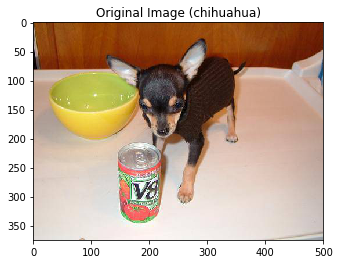

predicted = chihuahua, actual = chihuahua, Correct = True


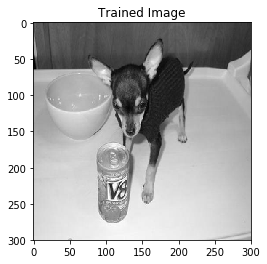

In [67]:
train_yhat = model.predict(X_train)
sample_prediction(X_train, y_train, train_ids, train_yhat)

In [70]:
test_yhat = model.predict(X_test)

c1b6ec8d72008f10ca5bbd928b41ba97


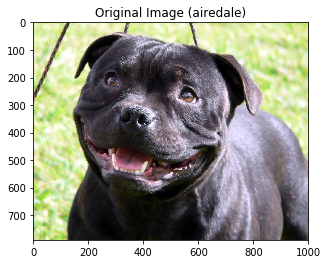

predicted = great_dane, actual = airedale, Correct = False


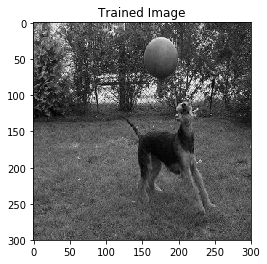

In [78]:
sample_prediction(X_test, y_test, train_ids, test_yhat)

predicted = bedlington_terrier, actual = papillon, Correct = False


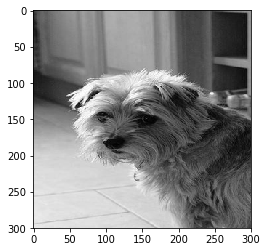

In [280]:
sample_prediction(X_test, y_test, predictions)

In [14]:
import tensorflow as tf

In [16]:
tf.test.is_gpu_available()

False